In [ ]:
# !pip install -q kaggle

# from google.colab import files
# print("Upload your kaggle.json file")
# uploaded = files.upload()

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d mateuszbuda/lgg-mri-segmentation
# !unzip -q lgg-mri-segmentation.zip -d lgg-mri-segmentation

# import sys
# !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
# !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth



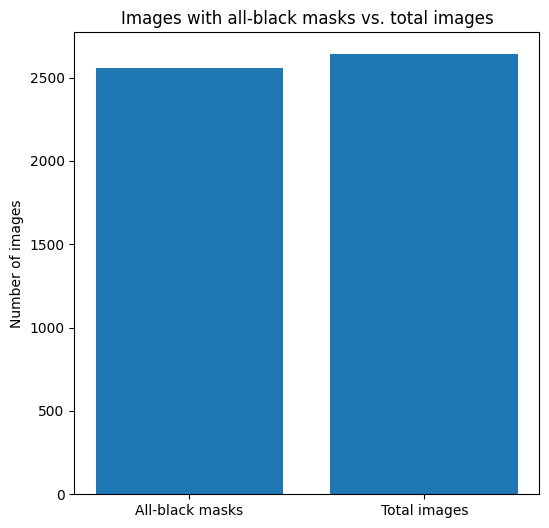

Number of images with all-black masks: 2556


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(file_path):
    return cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

dataset_path = 'lgg-mri-segmentation/kaggle_3m'
patients = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Counter for images with all-black masks
all_black_masks_count = 0

for patient in patients:
    patient_folder = os.path.join(dataset_path, patient)
    image_files = [f for f in os.listdir(patient_folder) if f.endswith('.tif') and not f.endswith('_mask.tif')]
    
    for img_file in image_files:
        mask_file = img_file[:-4] + '_mask.tif'
        mask_path = os.path.join(patient_folder, mask_file)
        
        mask = load_image(mask_path)
        
        # Check if the mask is all black
        if np.all(mask == 0):
            all_black_masks_count += 1

# Visualize the number of images with all-black masks
plt.figure(figsize=(6, 6))
plt.bar(['All-black masks', 'Total images'], [all_black_masks_count, len(patients) * len(image_files)])
plt.ylabel('Number of images')
plt.title('Images with all-black masks vs. total images')
plt.show()

print("Number of images with all-black masks:", all_black_masks_count)


In [ ]:
import os
import cv2
import numpy as np

def load_image(file_path):
    return cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

dataset_path = 'lgg-mri-segmentation/kaggle_3m'
patients = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

selected_image = None
selected_mask = None

for patient in patients:
    patient_folder = os.path.join(dataset_path, patient)
    image_files = [f for f in os.listdir(patient_folder) if f.endswith('.tif') and not f.endswith('_mask.tif')]
    
    for img_file in image_files:
        mask_file = img_file[:-4] + '_mask.tif'
        img_path = os.path.join(patient_folder, img_file)
        mask_path = os.path.join(patient_folder, mask_file)
        
        mask = load_image(mask_path)
        
        # Check if the mask is not all black
        if not np.all(mask == 0):
            selected_image = img_path
            selected_mask = mask_path
            break
    if selected_image is not None:
        break

if selected_image is not None:
    print("Selected image:", selected_image)
    print("Selected mask:", selected_mask)
else:
    print("No images found with non-black masks.")


Selected image: lgg-mri-segmentation/kaggle_3m/TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_13.tif
Selected mask: lgg-mri-segmentation/kaggle_3m/TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_13_mask.tif


lgg-mri-segmentation/kaggle_3m/TCGA_HT_7608_19940304/TCGA_HT_7608_19940304_6.tif lgg-mri-segmentation/kaggle_3m/TCGA_HT_7608_19940304/TCGA_HT_7608_19940304_6_mask.tif


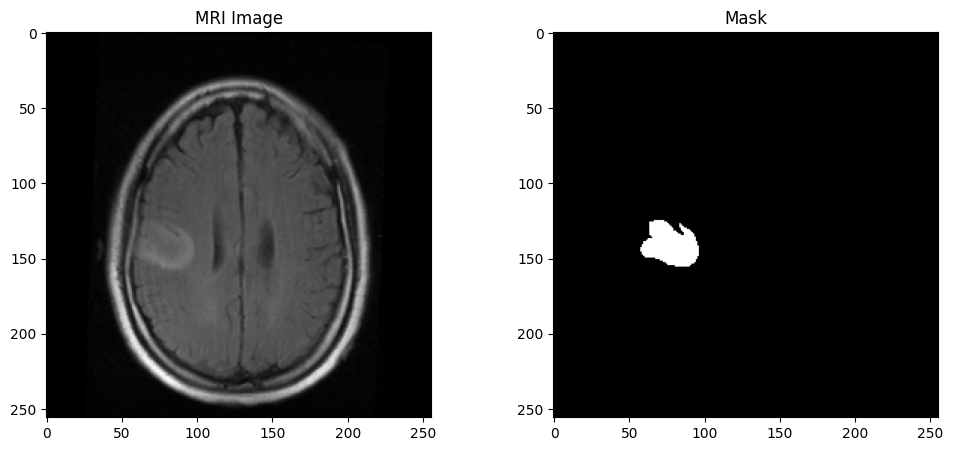

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def load_image(file_path):
    return cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

def visualize_example(image, mask):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('MRI Image')
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Mask')
    plt.show()

dataset_path = 'lgg-mri-segmentation/kaggle_3m'

# List of patient folders
patients = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Choose a patient folder
patient_folder = os.path.join(dataset_path, patients[2])

# Load image and corresponding mask
image_files = [f for f in os.listdir(patient_folder) if f.endswith('.tif') and not f.endswith('_mask.tif')]
mask_files = [f for f in os.listdir(patient_folder) if f.endswith('_mask.tif')]

# Visualize an example
img_file = image_files[10]
mask_file = img_file[:-4] + '_mask.tif'  # Find the corresponding mask file
img_path = os.path.join(patient_folder, img_file)
mask_path = os.path.join(patient_folder, mask_file)
print(img_path, mask_path)
# image = load_image(img_path)
# mask = load_image(mask_path)
# visualize_example(image, mask)
image = load_image(selected_image)
mask = load_image(selected_mask)
visualize_example(image, mask)



In [ ]:
import numpy as np

def show_anns(anns, background_image):
    if len(anns) == 0:
        return background_image

    # Sort the annotations by their area in descending order
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)

    # Create a copy of the background image to draw the masks on
    result_image = background_image.copy()

    # Iterate through the sorted annotations
    for ann in sorted_anns:
        # Get the segmentation mask of the current annotation
        m = ann['segmentation']

        # Expand the dimensions of the mask to match the number of channels in the background image
        m = np.expand_dims(m, axis=-1)

        # Repeat the mask across all three channels
        m = np.repeat(m, 3, axis=-1)

        # Generate a random color mask
        color_mask = np.random.randint(0, 256, (1, 3))

        # Create an image with the same dimensions as the mask and the random color
        img = np.ones((m.shape[0], m.shape[1], 3)) * color_mask

        # Overlay the mask (multiplied by 0.35 for transparency) on the result image
        result_image[m > 0] = result_image[m > 0] * 0.65 + img[m > 0] * 0.35

    return result_image



In [ ]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
device = "cuda"
model_type = "default"

import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)


In [ ]:
def convert_to_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
print(image.shape)
image2 = convert_to_rgb(image)
# image2 = image
print(image2.shape)

(256, 256)
(256, 256, 3)


In [ ]:
masks = mask_generator.generate(image2)
gen_mask = show_anns(masks,image2)
print(len(masks))

7


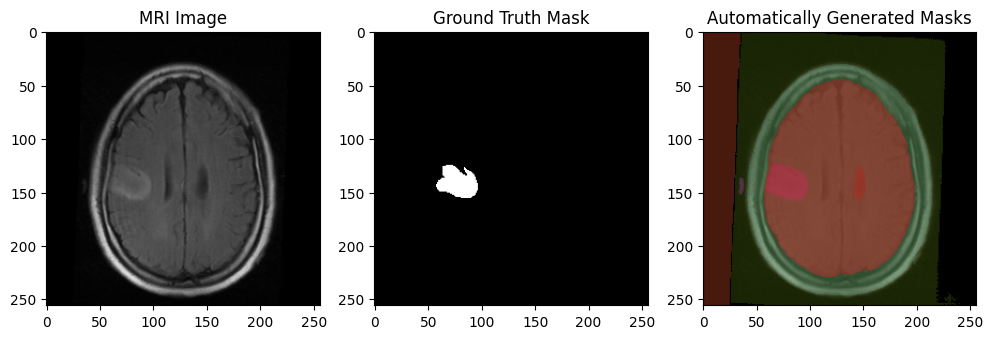

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
axes[0].imshow(image2, cmap='gray')
axes[0].set_title('MRI Image')
axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Ground Truth Mask')
axes[2].imshow(gen_mask, cmap='gray')
axes[2].set_title('Automatically Generated Masks')
plt.show()

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.8,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=10,  # Requires open-cv to run post-processing
)

In [ ]:
masks2 = mask_generator_2.generate(image2)
gen_mask2 = show_anns(masks2,image2)
print(len(masks2))

10


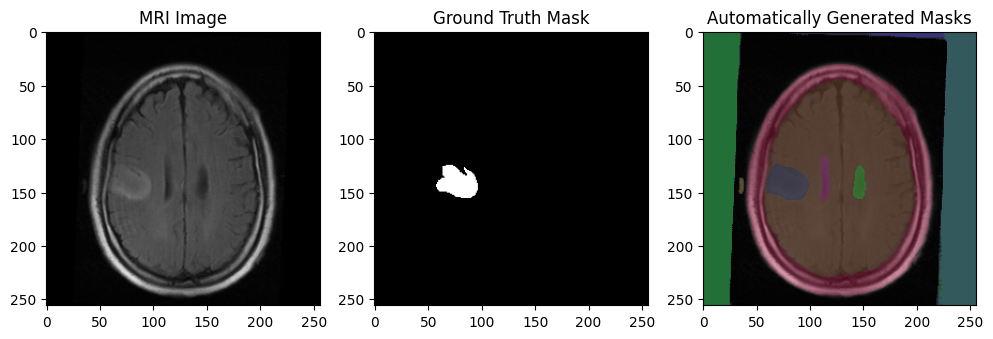

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
axes[0].imshow(image2, cmap='gray')
axes[0].set_title('MRI Image')
axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Ground Truth Mask')
axes[2].imshow(gen_mask2, cmap='gray')
axes[2].set_title('Automatically Generated Masks')
plt.show()